In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
df.report_year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [4]:
df.utility_id_ferc1.unique()

array([  1,   2,   4,   6,   7,   9,  10,  11,  12,  15,  16,  17,  20,
        24,  26, 191,  31,   8,  42,  43,  44,  46,  50,  51,  54,  55,
        38,  73,  81, 127,  19,  36,  61,  63,  64,  68,  70,  72,  74,
        75,  77,  79,  80,  85,  96,  97,  98,  99,  27,  30,  52, 135,
        69,  87,  88, 121, 122, 102, 193, 194, 125, 126, 128, 129, 130,
       131, 132, 134, 137, 141, 142, 143, 145, 117, 146, 150, 151, 157,
       114, 115, 118, 161, 162, 163, 164, 166, 169, 170, 173, 176, 177,
       179, 182, 185, 186, 187, 188, 189,  33,  89, 200, 201, 204, 208,
       159, 119,  25,  49, 108, 155, 100, 107, 144, 116, 136,  67,  82,
        95, 133, 138, 148, 190,  56, 113,  32, 120, 147, 160, 175,  22,
        39,  62,  76, 101, 124, 154, 156, 174, 195, 104,  14,  57,  41,
        45, 149, 213, 210,  29,  94, 230,  71,  21, 202, 244, 226, 227,
        65, 171, 181, 221, 266, 245, 270, 276, 203, 271, 283, 281, 285,
       287, 196, 288, 294, 262, 178,  58, 432, 315, 403, 449, 45

In [5]:
len(df.record_id.unique())

29523

In [6]:
df['fuel_cost_per_unit_mmbtu'] = df['fuel_mmbtu_per_unit'] * df['fuel_cost_per_mmbtu']

df['fuel_delivery_cost'] = df['fuel_cost_per_unit_delivered'] * df['fuel_qty_burned']
df['fuel_burnt_cost'] = df['fuel_cost_per_unit_burned'] * df['fuel_qty_burned']
df['fuel_energy_cost'] = df['fuel_cost_per_unit_mmbtu'] * df['fuel_qty_burned'] 

In [40]:
df_dict = {"year":[]}
cols = df['fuel_type_code_pudl'].unique()
for col in cols:
  df_dict["year"].append(col)
for year in df.report_year.unique():
  df_dict[year] = []
  num_list = df[df.report_year.values == year]['fuel_type_code_pudl'].value_counts().tolist()
  while len(num_list) < 6:
      num_list.append(0)
  for num in num_list:
    if year in df_dict:
      df_dict[year].append(num)

fuel_type_df = pd.DataFrame(df_dict)
fuel_type_df.set_index("year", inplace = True)
fuel_type_df = fuel_type_df.T
fuel_type_df

year,coal,gas,nuclear,oil,waste,other
1994,487,475,166,71,24,12
1995,503,475,113,73,22,15
1996,431,426,160,41,22,8
1997,448,417,163,31,23,12
1998,515,431,68,57,20,16
1999,493,425,57,48,14,13
2000,474,416,403,56,14,10
2001,474,454,363,44,15,6
2002,443,374,332,34,15,7
2003,431,403,329,30,12,6


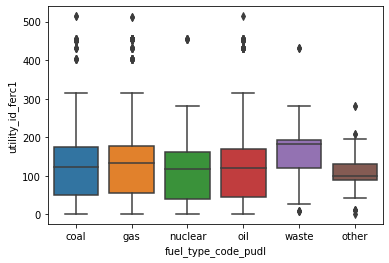

In [72]:
sns.boxplot(y='utility_id_ferc1', x='fuel_type_code_pudl', data=df)

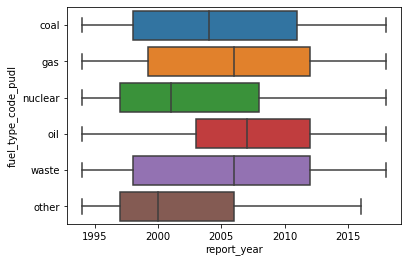

In [61]:
sns.boxplot(x='report_year', y='fuel_type_code_pudl', data=df)

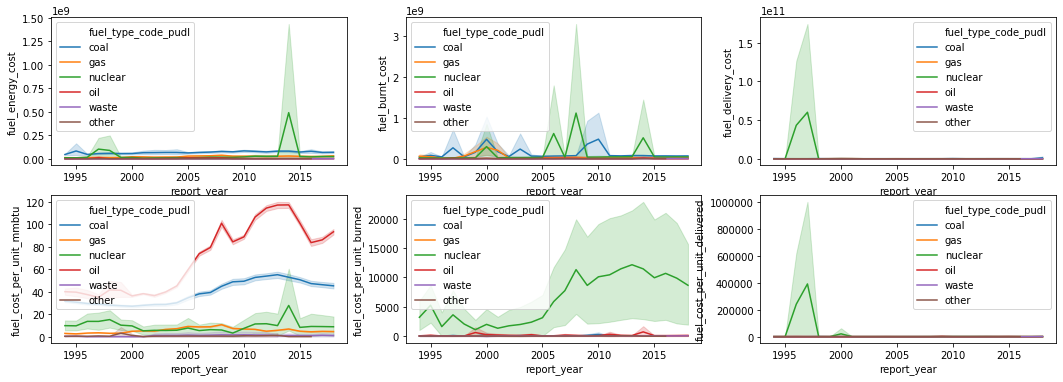

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3,nrows=2)
plt.gcf().set_size_inches(18,6, forward=False)

sns.lineplot('report_year', 'fuel_energy_cost',data=df, hue='fuel_type_code_pudl', ax=axs[0,0])
sns.lineplot('report_year', 'fuel_burnt_cost',data=df, hue='fuel_type_code_pudl', ax=axs[0,1])
sns.lineplot('report_year', 'fuel_delivery_cost',data=df, hue='fuel_type_code_pudl', ax=axs[0,2])
sns.lineplot('report_year', 'fuel_cost_per_unit_mmbtu',data=df, hue='fuel_type_code_pudl', ax=axs[1,0])
sns.lineplot('report_year', 'fuel_cost_per_unit_burned',data=df, hue='fuel_type_code_pudl', ax=axs[1,1])
sns.lineplot('report_year', 'fuel_cost_per_unit_delivered',data=df, hue='fuel_type_code_pudl', ax=axs[1,2])

In [46]:
fuel_burnt_dict = {"year":[]}

cols = df['fuel_type_code_pudl'].unique()
for col in cols:
  fuel_burnt_dict["year"].append(col)
for year in df.report_year.unique():
  fuel_burnt_dict[year] = []
  number_list = [df[(df.report_year == year) & (df.fuel_type_code_pudl.str.contains(col))]['fuel_qty_burned'].sum() 
                  for col in cols]
  while len(number_list) < 6:
      number_list.append(0)

  for num in number_list:
    if year in df_dict:
      fuel_burnt_dict[year].append(num)

fuel_burnt_df = pd.DataFrame(fuel_burnt_dict)
fuel_burnt_df.set_index("year", inplace = True)
fuel_burnt_df = fuel_burnt_df.T
fuel_burnt_df

year,coal,gas,nuclear,oil,waste,other
1994,7.172082e+08,2.432212e+09,206936645.0,1469716.0,1242241.0,5094458.0
1995,1.257398e+09,2.570880e+09,205408058.0,809178.0,1642051.0,422054754.0
1996,6.988514e+08,1.915218e+09,148738376.0,3637754.0,1102632.0,1144943.0
1997,8.169024e+08,2.039925e+09,162556374.0,53849314.0,1528774.0,3211371.0
1998,8.982095e+08,2.554651e+09,150463637.0,543608.0,1624599.0,11577962.0
1999,8.805301e+08,2.416453e+09,144288470.0,640093.0,1108979.0,2324239.0
2000,8.620492e+08,2.311988e+09,191332015.0,23157705.0,1271108.0,4302104.0
2001,8.564316e+08,2.031479e+09,227524165.0,30308989.0,1361951.0,715770.0
2002,8.144357e+08,1.565940e+09,191259386.0,11179575.0,1394020.0,1293296.0
2003,8.018815e+08,1.262430e+09,188195311.0,32432269.0,1082223.0,1099465.0


<BarContainer object of 25 artists>

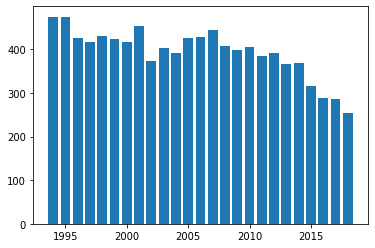

In [45]:
import matplotlib.pyplot as plt

x = fuel_type_df.index
y = fuel_type_df.gas.values
plt.bar(x, y)

In [41]:
fuel_type_df.index

Index([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018],
      dtype='object')

In [43]:
fuel_type_df['gas'].values

array([475, 475, 426, 417, 431, 425, 416, 454, 374, 403, 391, 427, 429,
       444, 408, 399, 406, 385, 392, 366, 369, 317, 289, 286, 254])

<BarContainer object of 25 artists>

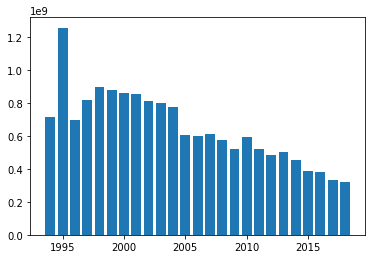

In [50]:
import matplotlib.pyplot as plt
x = fuel_burnt_df.index
y = fuel_burnt_df['coal'].values
plt.bar(x, y)

In [37]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,fuel_cost_per_unit_mmbtu,fuel_delivery_cost,fuel_burnt_cost,fuel_energy_cost
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,2.952300e+04,2.952300e+04
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354,33.494986,1.789718e+08,6.469307e+07,2.999880e+07
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939,35.677572,1.380416e+10,1.268195e+09,1.507077e+08
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000,-0.254941,-1.319576e+07,-2.111377e+06,-1.199547e+04
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000,4.806698,1.271366e+05,2.920031e+05,2.452455e+05
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000,23.869560,1.804572e+06,3.153365e+06,2.726668e+06
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000,45.701537,2.127106e+07,2.808622e+07,2.680758e+07
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000,319.951726,1.676325e+12,9.280174e+10,1.892485e+10


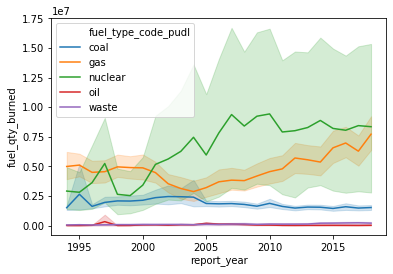

In [38]:
sns.lineplot(x='report_year', y='fuel_qty_burned', hue='fuel_type_code_pudl', data=df[df.fuel_type_code_pudl != 'other'])